# Homework 11: Model-Based Machine Learning
### Beatrice Brown-Mulry

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Question Set 1
### Homework #1 and #2

### **#1:**

Objective: Understand and implement the basic susceptible-infectious-recovered
(SIR) compartmental model.

**Part 1a.**

In [86]:
def sir_model(ax, T: int = 150, dt: float = 0.1, 
              beta: float = 0.05, gamma: float = 0.04, N=1.0e5, 
              plot_title: str = '', s_init=None, i_init=None, r_init=None):
   # derive number of time steps
   K = round(T/dt)

   # define a time array for plotting
   time_arr = np.arange(0, T, dt)
   
   # initialize arrays
   s_arr = np.zeros(shape=(K,))
   i_arr = np.zeros(shape=(K,))
   r_arr = np.zeros(shape=(K,))

   # set first values in arrays
   s_arr[0] = s_init if s_init is not None else (N - 1) / N
   i_arr[0] = i_init if i_init is not None else 1 / N
   r_arr[0] = r_init if r_init is not None else 0.0

   # iterate over the range 0 to K-1
   for t in range(K-1):
      delta_infected = beta * s_arr[t] * i_arr[t]
      delta_recovered = gamma * i_arr[t]

      s_arr[t + 1] = -delta_infected * dt + s_arr[t]
      i_arr[t + 1] = (delta_infected - delta_recovered) * dt + i_arr[t]
      r_arr[t + 1] = delta_recovered * dt + r_arr[t]

   # plot arrays
   ax.plot(time_arr, s_arr, color='#118ab2', label='Susceptible')
   ax.plot(time_arr, i_arr, color='#ef476f', label='Infected')
   ax.plot(time_arr, r_arr, color='#06d6a0', label='Recovered')
   ax.set_ylabel('% Population')
   ax.set_xlabel('Time (days)')
   ax.set_title(plot_title)

   # format y axis as a percentage
   ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

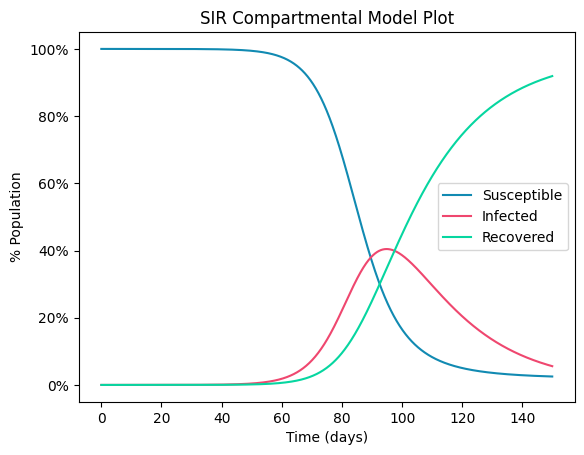

In [87]:
# define parameters
T = 150  # number of days
dt = 0.1  # simulation time step (in days)

beta = 0.2
gamma = 0.05

N = 4.0e5

fig, ax = plt.subplots(1, 1, dpi=100)
sir_model(ax, T, dt, beta, gamma, N, plot_title="SIR Compartmental Model Plot")
ax.legend()
plt.show()

**Part 1b.**

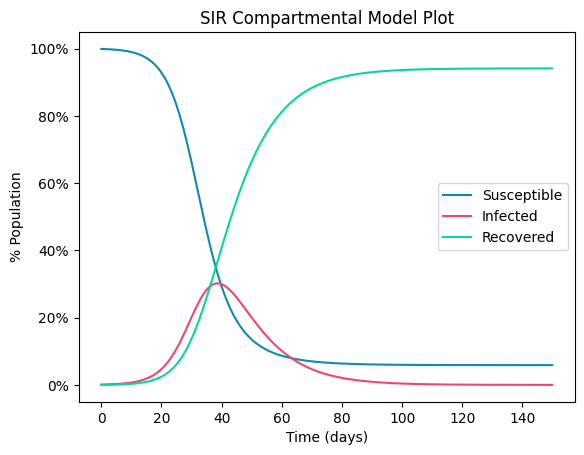

In [88]:
# define parameters
T = 150  # number of days
dt = 0.1  # simulation time step (in days)

beta = 0.3
gamma = 0.1

# converting init numbers to population proportions
N = 1000
s_init = 999 / N
i_init = 1 / N
r_init = 0 / N

fig, ax = plt.subplots(1, 1, dpi=100)
sir_model(
    ax, T, dt, beta, gamma, N, 
    plot_title="SIR Compartmental Model Plot", 
    s_init=s_init, 
    i_init=i_init, 
    r_init=r_init
)
ax.legend()
plt.show()

**Part 1c.**

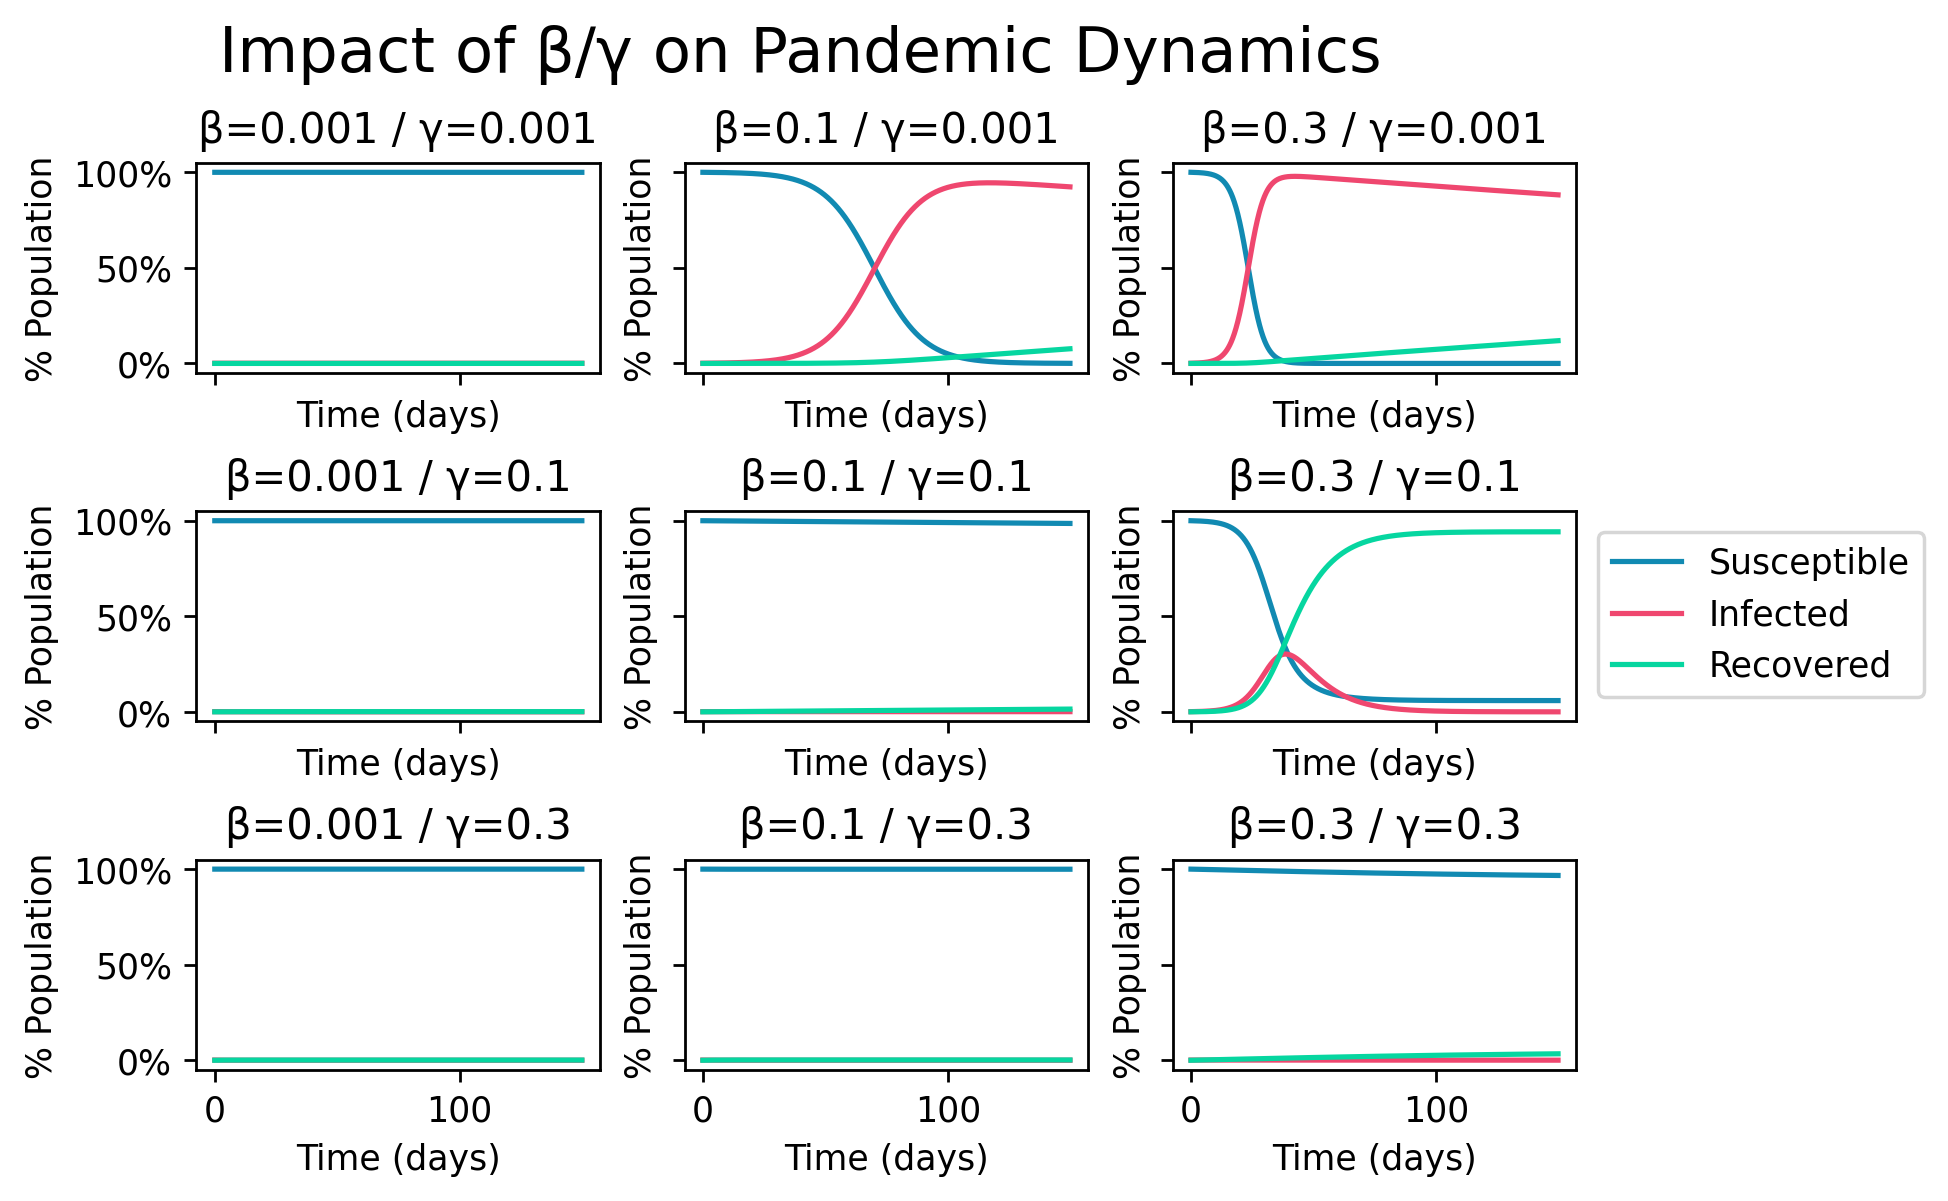

In [89]:
beta_list = [0.001, 0.10, 0.30]
gamma_list = [0.001, 0.10, 0.30]

# define parameters
T = 150  # number of days
dt = 0.1  # simulation time step (in days)

fig, ax = plt.subplots(len(gamma_list), len(beta_list), dpi=250, sharex=True, sharey=True)

for beta, col_num in zip(beta_list, range(0, len(beta_list))):
    for gamma, row_num in zip(gamma_list, range(0, len(gamma_list))):
        sir_model(ax[row_num, col_num], T, dt, beta, gamma, N, plot_title=f"β={beta} / γ={gamma}")

# get legend handles from last axix
handles, labels = ax[col_num, row_num].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=1, bbox_to_anchor=(1.1, .405))

# format and plot
fig.suptitle("Impact of β/γ on Pandemic Dynamics", fontsize=18)
fig.tight_layout(pad=0.7)
plt.show()

### **#2:**

Implement the susceptible-exposed-infectious-recovered (SEIR) model, introducing an “Exposed” compartment and considering birth and death rates.

**Part 2a.**

In [90]:
def seir_model(ax, T: int = 150, dt: float = 0.1, mu: float = 0.01, 
              beta: float = 0.05, sigma: float = 0.2, gamma: float = 0.04, 
              N=1.0e5, plot_title: str = '', s_init=None, e_init=None, 
              i_init=None, r_init=None):
    # derive number of time steps
    K = round(T/dt)

    # define a time array for plotting
    time_arr = np.arange(0, T, dt)

    # initialize arrays
    s_arr = np.zeros(shape=(K,))
    e_arr = np.zeros(shape=(K,))
    i_arr = np.zeros(shape=(K,))
    r_arr = np.zeros(shape=(K,))

    # set first values in arrays
    s_arr[0] = s_init if s_init is not None else (N - 5) / N
    e_arr[0] = e_init if e_init is not None else 4 / N
    i_arr[0] = i_init if i_init is not None else 1 / N
    r_arr[0] = r_init if r_init is not None else 0.0

    # iterate over the range 0 to K-1
    for t in range(K-1):
        delta_exposed = beta * s_arr[t] * i_arr[t]
        curr_n = s_arr[0] + e_arr[0] + i_arr[0] + r_arr[0]

        s_arr[t + 1] = ((mu * curr_n) - delta_exposed - (mu * s_arr[t])) * dt + s_arr[t]
        e_arr[t + 1] = (delta_exposed - ((sigma + mu) * e_arr[t])) * dt + e_arr[t]
        i_arr[t + 1] = ((sigma * e_arr[t]) - ((gamma + mu) * i_arr[t])) * dt + i_arr[t]
        r_arr[t + 1] = ((gamma * i_arr[t]) - (mu * r_arr[t])) * dt + r_arr[t]

    # plot arrays
    ax.plot(time_arr, s_arr, color='#118ab2', label='Susceptible')
    ax.plot(time_arr, e_arr, color='#ffd166', label='Exposed')
    ax.plot(time_arr, i_arr, color='#ef476f', label='Infected')
    ax.plot(time_arr, r_arr, color='#06d6a0', label='Recovered')
    # ax.legend()
    ax.set_ylabel('% Population')
    ax.set_xlabel('Time (days)')
    ax.set_title(plot_title)

    # format y axis as a percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

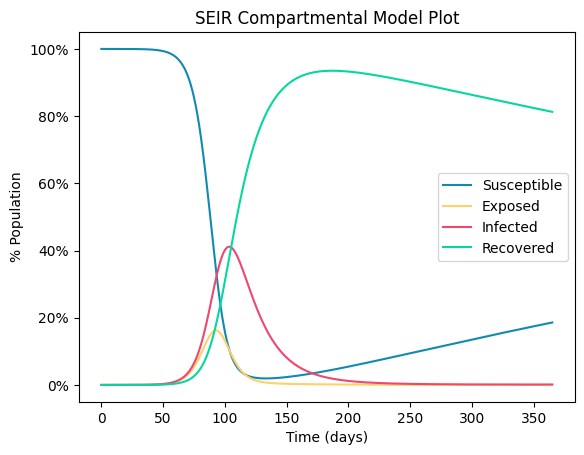

In [91]:
# define parameters
T = 365  # number of days
dt = 0.1  # simulation time step (in days)

mu = 0.001
beta = 0.3
sigma = 0.2
gamma = 0.05

N = 5.0e5

fig, ax = plt.subplots(1, 1, dpi=100)
seir_model(ax, T, dt, mu, beta, sigma, gamma, N, plot_title="SEIR Compartmental Model Plot")
ax.legend()
plt.show()

**Part 2b.**

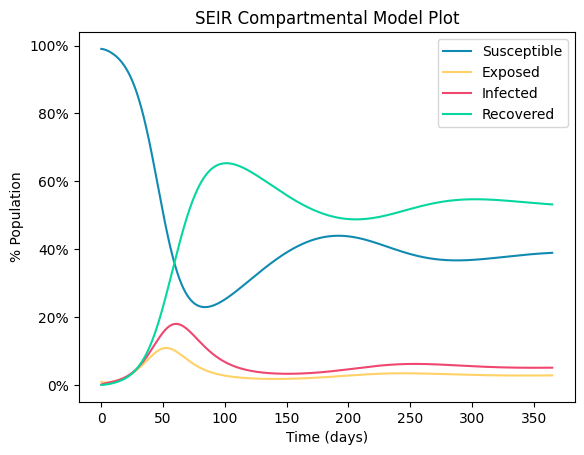

In [92]:
# define parameters
T = 365  # number of days
dt = 0.1  # simulation time step (in days)

mu = 0.01
beta = 0.3
sigma = 0.2
gamma = 0.1

# convert initial states to proportions
N = 1000
s_init = 990 / N
e_init = 9 / N
i_init = 1 / N
r_init = 0

fig, ax = plt.subplots(1, 1, dpi=100)
seir_model(
    ax, T, dt, mu, beta, 
    sigma, gamma, N, 
    plot_title="SEIR Compartmental Model Plot", 
    s_init=s_init, 
    e_init=e_init, 
    i_init=i_init, 
    r_init=r_init
)
ax.legend()
plt.show()